In [1]:
!pip3 install anytree

In [2]:
from lean_euler import LeanEuler
import networkx as nx
from euler_input_visualization_nxpd import visualize_euler_input
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'
from PW_explorer.run_clingo import run_clingo
from PW_explorer.load_worlds import load_worlds
from PW_explorer.pwe_query import PWEQuery
from PW_explorer.Custom_Visualization_Functions import euler_visualization_nxpd
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

In [3]:
import PW_explorer as pwe

In [164]:
# fname = 'Preprocessed_CleanTax_Input/abstract4_mnpw.txt'
# fname = 'Preprocessed_CleanTax_Input/auto_example.txt'
# fname = 'Preprocessed_CleanTax_Input/cen_ndc_1pw.txt'
# fname = 'Preprocessed_CleanTax_Input/beer_tax.txt'
# fname = 'Tests/cronquist.txt'
# fname = 'Tests/cronquist_555.txt'
# fname = 'Tests/magnolia_2012.txt'
# fname = 'Tests/magnolia_91_14.txt'
# fname = 'Tests/magnolia_83_14.txt'
# fname = 'Tests/magnolia_33_14.txt'
# fname = 'Tests/magnolia_68_14.txt'
fname = 'Tests/autos.txt'

In [165]:
cleantax_file = open(fname, 'r').read().split('\n')
cleantax_file

['# Source: raunich2104targetdriven',
 '',
 'taxonomy T1 Source',
 '(Automobile Sedan Wagon SUV)',
 '(Sedan Sedan_Audi Sedan_BMW)',
 '(Wagon Wagon_Audi Wagon_BMW)',
 '',
 'taxonomy T2 Target',
 '(Automobile Audi BMW)',
 '(Audi Sedan_Audi Wagon_Audi SUV_Audi)',
 '(BMW Sedan_BMW SUV_BMW)',
 '',
 'articulations T1 T2',
 '[T1.Automobile equals T2.Automobile]',
 '[T1.Sedan_Audi equals T2.Sedan_Audi]',
 '[T1.Sedan_BMW equals T2.Sedan_BMW]',
 '[T1.Wagon_Audi equals T2.Wagon_Audi]',
 '[T1.Wagon_BMW is_included_in T2.BMW]',
 '[T1.SUV includes T2.SUV_Audi]',
 '#[T1.SUV includes T2.SUV_BMW]']

In [60]:
# cleantax_file = ['taxonomy T1 Source',
#  '(Automobile Sedan Wagon SUV)',
#  '(Sedan Sedan_Audi Sedan_BMW)',
#  '(Wagon Wagon_Audi Wagon_BMW)',
#  'taxonomy T2 Target',
#  '(Automobile Audi BMW)',
#  '(Audi Sedan_Audi Wagon_Audi SUV_Audi)',
#  '(BMW Sedan_BMW SUV_BMW)',
#  'articulations T1 T2',
#  '[T1.Automobile equals T2.Automobile]',
#  '[T1.Sedan_Audi equals T2.Sedan_Audi]',
#  '[T1.Sedan_BMW equals T2.Sedan_BMW]',
#  '[T1.Wagon_Audi equals T2.Wagon_Audi]',
#  '[T1.Wagon_BMW is_included_in T2.BMW]',
#  '[T2.SUV_Audi is_included_in T1.SUV]',
#  '[T1.SUV includes T2.SUV_BMW]',
#  '']

In [61]:
# cleantax_file = ['taxonomy T1 Source',
#  '(K C)',
#  '(C A B)',
#  'taxonomy T2 Target',
#  '(K D B)',
#  'articulations T1 T2',
#  '[T1.K equals T2.K]',
#  '[T1.A overlaps T2.D]',
#  '[T1.B is_included_in T2.D]',
#  '[T1.C includes T2.D]',
#  ]

In [62]:
# CEN-NDC
cleantax_file = [
    '# Taxonomy-1: NSF BD Hubs http://www.nsf.gov/pubs/2015/nsf15562/nsf15562.htm',
    '# Taxonomy 2: http://www.nationaldiversitycouncil.org/wp-content/uploads/2011/12/us_regions.jpg',
    '#',
    'taxonomy CEN Census_Regions',
    '(USA Northeast Midwest South West)',
    'taxonomy NDC National_Diversity_Council',
    '(USA Midwest Northeast Southeast Southwest West)',
    'articulations CEN NDC',
    '[CEN.USA equals NDC.USA]',
    '[CEN.West includes NDC.West]',
    '[CEN.West disjoint NDC.Northeast]',
    '[CEN.South overlaps NDC.Southwest]',
    '[CEN.South includes NDC.Southeast]',
    '[CEN.Midwest equals NDC.Midwest]',
    '[CEN.Northeast is_included_in NDC.Northeast]',
    '']

In [425]:
# CEN-TZ
cleantax_file = [
    'taxonomy CEN Census_Regions',
    '(USA Midwest South West Northeast)',
    'taxonomy TZ Time_Zone',
    '(USA Pacific Mountain Central Eastern)',
    'articulations CEN TZ',
    '[CEN.Midwest disjoint TZ.Pacific]',
    '[CEN.Midwest overlaps TZ.Eastern]',
    '[CEN.Midwest overlaps TZ.Mountain]',
    '[CEN.Northeast is_included_in TZ.Eastern]',
    '[CEN.South disjoint TZ.Pacific]',
    '[CEN.South overlaps TZ.Central]',
    '[CEN.South overlaps TZ.Eastern]',
    '[CEN.South overlaps TZ.Mountain]',
    '[CEN.USA equals TZ.USA]',
    '[CEN.West disjoint TZ.Central]',
    '[CEN.West disjoint TZ.Eastern]',
    '[CEN.West overlaps TZ.Mountain]',
    '']

In [132]:
# NDC TZ
cleantax_file = [
    'taxonomy NDC National_Diversity_Council',
    '(USA Midwest Northeast Southeast Southwest West)',
    'taxonomy TZ Time_Zone',
    '(USA Pacific Mountain Central Eastern)',
    'articulations NDC TZ',
    '[NDC.Midwest overlaps TZ.Eastern]',
    '[NDC.Midwest overlaps TZ.Mountain]',
    '[NDC.USA equals TZ.USA]',
    '[NDC.Southwest overlaps TZ.Mountain]',
    '[NDC.Southeast disjoint TZ.Mountain]',
    '[NDC.West disjoint TZ.Central]',
    '[NDC.Southeast overlaps TZ.Central]',
    '[NDC.Midwest overlaps TZ.Central]',
    '[NDC.Northeast is_included_in TZ.Eastern]',
    '[NDC.Southwest disjoint TZ.Eastern]',
    '[NDC.West includes TZ.Pacific]',
    '[NDC.West disjoint TZ.Eastern]',
    '']

In [166]:
gt_rel_data, tax_data = LeanEuler.parse_cleantax(cleantax_file)

In [167]:
gt_rel_data

,Node1,Relation,Node2
0,"""T1_Automobile""",parent,"""T1_Sedan"""
1,"""T1_Automobile""",parent,"""T1_Wagon"""
2,"""T1_Automobile""",parent,"""T1_SUV"""
3,"""T1_Sedan""",parent,"""T1_Sedan_Audi"""
4,"""T1_Sedan""",parent,"""T1_Sedan_BMW"""
5,"""T1_Wagon""",parent,"""T1_Wagon_Audi"""
6,"""T1_Wagon""",parent,"""T1_Wagon_BMW"""
7,"""T2_Automobile""",parent,"""T2_Audi"""
8,"""T2_Automobile""",parent,"""T2_BMW"""
9,"""T2_Audi""",parent,"""T2_Sedan_Audi"""


In [168]:
tax_data

{'T1': {'T1': Node('/T1'),
  'Automobile': Node('/T1/"T1_Automobile"'),
  'Sedan': Node('/T1/"T1_Automobile"/"T1_Sedan"'),
  'Wagon': Node('/T1/"T1_Automobile"/"T1_Wagon"'),
  'SUV': Node('/T1/"T1_Automobile"/"T1_SUV"'),
  'Sedan_Audi': Node('/T1/"T1_Automobile"/"T1_Sedan"/"T1_Sedan_Audi"'),
  'Sedan_BMW': Node('/T1/"T1_Automobile"/"T1_Sedan"/"T1_Sedan_BMW"'),
  'Wagon_Audi': Node('/T1/"T1_Automobile"/"T1_Wagon"/"T1_Wagon_Audi"'),
  'Wagon_BMW': Node('/T1/"T1_Automobile"/"T1_Wagon"/"T1_Wagon_BMW"')},
 'T2': {'T2': Node('/T2'),
  'Automobile': Node('/T2/"T2_Automobile"'),
  'Audi': Node('/T2/"T2_Automobile"/"T2_Audi"'),
  'BMW': Node('/T2/"T2_Automobile"/"T2_BMW"'),
  'Sedan_Audi': Node('/T2/"T2_Automobile"/"T2_Audi"/"T2_Sedan_Audi"'),
  'Wagon_Audi': Node('/T2/"T2_Automobile"/"T2_Audi"/"T2_Wagon_Audi"'),
  'SUV_Audi': Node('/T2/"T2_Automobile"/"T2_Audi"/"T2_SUV_Audi"'),
  'Sedan_BMW': Node('/T2/"T2_Automobile"/"T2_BMW"/"T2_Sedan_BMW"'),
  'SUV_BMW': Node('/T2/"T2_Automobile"/"T2_BMW"/"

In [169]:
gt_rules = LeanEuler.gen_asp_rules(gt_rel_data, tax_data, encoding='mnpw')

In [170]:
print('\n'.join(gt_rules))

r(1..35).

% Region Meanings
in(X, M) :- r(M), concept(X, T, N), N1=N+1, bit(M, T, N1).
out(X, M) :- r(M), concept(X, T, N), N1=N+1, not bit(M, T, N1).
in(X, M) :- r(M), concept2(X, _), not out(X, M).
irs(M) :- in(X, M), out(X, M), r(M), concept2(X, _).

% Region Constraints
irs(X) :- ir(X, _).
vrs(X) :- vr(X, _).
vr(X, X) :- not irs(X), r(X).
ir(X, X) :- not vrs(X), r(X).
:- vrs(X), irs(X).

concept2(A, B) :- concept(A,B,_).

% Taxonomy Description

%  Euler Bit
bit(M, 0, V) :- r(M), M1=M/1, V = M1 \ 6.

%  Euler Bit
bit(M, 1, V) :- r(M), M1=M/6, V = M1 \ 6.

concept2("T1_Automobile", 0).
concept2("T1_Sedan", 0).
concept("T1_Sedan_Audi", 0, 0).
concept("T1_Sedan_BMW", 0, 1).
concept2("T1_Wagon", 0).
concept("T1_Wagon_Audi", 0, 2).
concept("T1_Wagon_BMW", 0, 3).
concept("T1_SUV", 0, 4).
concept2("T2_Automobile", 1).
concept2("T2_Audi", 1).
concept("T2_Sedan_Audi", 1, 0).
concept("T2_Wagon_Audi", 1, 1).
concept("T2_SUV_Audi", 1, 2).
concept2("T2_BMW", 1).
concept("T2_Sedan_BMW", 1, 3).


In [171]:
# Alternatively, short-cut
# rules = LeanEuler.gen_asp_rules_from_cleantax(cleantax_file, encoding='mnpw')
# print('\n'.join(rules))

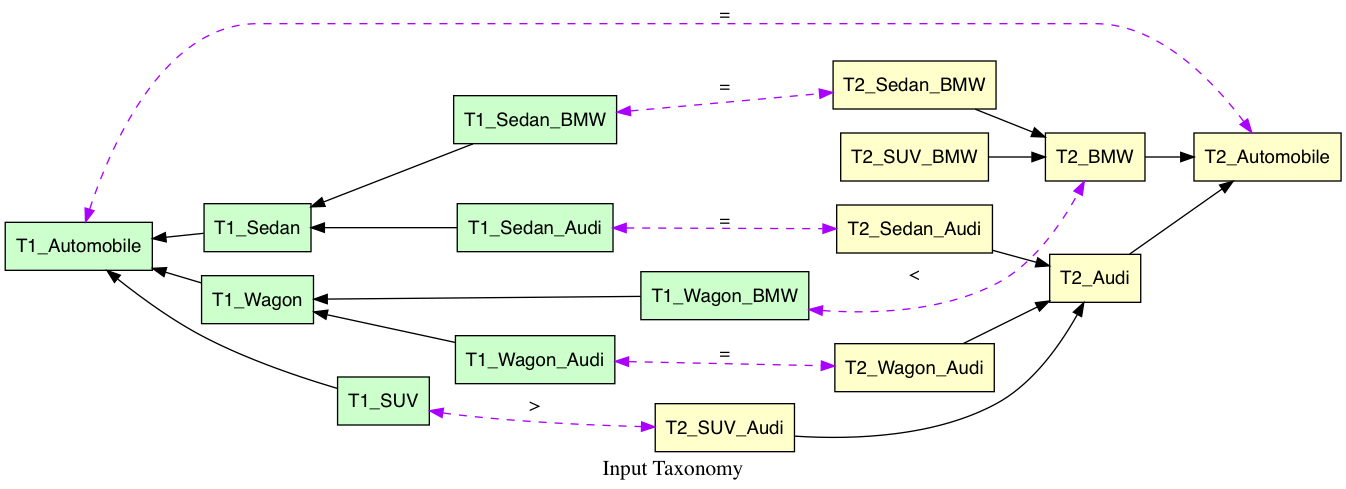

In [172]:
gt_G = visualize_euler_input(gt_rel_data, tax_data)
draw(gt_G)

In [173]:
gt_clingo_soln = run_clingo(clingo_rules=gt_rules)
print('\n'.join(gt_clingo_soln))

Answer: 1
u("T1_Sedan") u("T1_Wagon") u("T1_SUV") u("T1_Sedan_Audi") u("T1_Sedan_BMW") u("T1_Wagon_Audi") u("T1_Wagon_BMW") u("T2_Audi") u("T2_BMW") u("T2_Sedan_Audi") u("T2_Wagon_Audi") u("T2_SUV_Audi") u("T2_Sedan_BMW") u("T2_SUV_BMW") u("T1_Automobile") u("T2_Automobile") bl("T1_Automobile","T1_Sedan") bl("T1_Automobile","T1_Wagon") bl("T1_Automobile","T1_SUV") bl("T1_Sedan","T1_Sedan_Audi") bl("T1_Sedan","T1_Sedan_BMW") bl("T1_Wagon","T1_Wagon_Audi") bl("T1_Wagon","T1_Wagon_BMW") bl("T2_Automobile","T2_Audi") bl("T2_Automobile","T2_BMW") bl("T2_Audi","T2_Sedan_Audi") bl("T2_Audi","T2_Wagon_Audi") bl("T2_Audi","T2_SUV_Audi") bl("T2_BMW","T2_Sedan_BMW") bl("T2_BMW","T2_SUV_BMW") pp("T1_Sedan","T1_Automobile") pp("T1_Wagon","T1_Automobile") pp("T1_SUV","T1_Automobile") pp("T1_Sedan_Audi","T1_Sedan") pp("T1_Sedan_BMW","T1_Sedan") pp("T1_Wagon_Audi","T1_Wagon") pp("T1_Wagon_BMW","T1_Wagon") pp("T2_Audi","T2_Automobile") pp("T2_BMW","T2_Automobile") pp("T2_Sedan_Audi","T2_Audi") pp("T2_W

In [174]:
gt_dfs, gt_rels, gt_pws = load_worlds(clingo_output=gt_clingo_soln, preprocessed=False, reasoner='clingo')

Number of Models: 1


In [175]:
#gt_dfs.append(pd.DataFrame(columns=['pw', 'x1', 'x2']))

In [176]:
#gt_rels.append(pwe.pwe_helper.Relation(relation_name='po_2'))

In [177]:
# gt_rels[6].r_id = 6
# gt_rels[6].arity = 2

In [178]:
list(map(lambda x: x.__dict__, gt_rels))

[{'relation_name': 'u_1', 'arity': 1, 'r_id': 0},
 {'relation_name': 'bl_2', 'arity': 2, 'r_id': 1},
 {'relation_name': 'pp_2', 'arity': 2, 'r_id': 2},
 {'relation_name': 'rel_3', 'arity': 3, 'r_id': 3},
 {'relation_name': 'eq_2', 'arity': 2, 'r_id': 4},
 {'relation_name': 'po_2', 'arity': 2, 'r_id': 5},
 {'relation_name': 'dr_2', 'arity': 2, 'r_id': 6}]

In [179]:
gt_pws_vizs = euler_visualization_nxpd.visualize(dfs=gt_dfs, pws=gt_pws, relations=gt_rels, conn=None, project_name='cen_ndc', save_to_file=False)

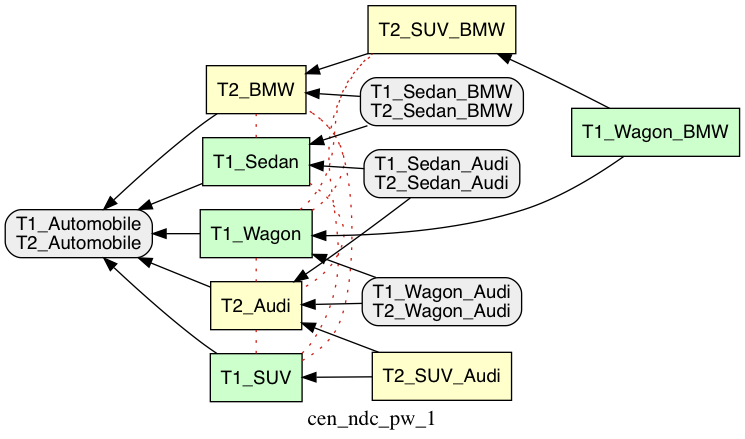

In [180]:
draw(gt_pws_vizs[0])

In [148]:
#G = gt_pws_vizs[0]

In [149]:
#draw(nx.bfs_tree(G=G, source='APG_Angiosperms\nC_Magnoliophyta', reverse=True))

In [150]:
def complexity(pw_id, dfs, rels):
    po_df_id = pwe.pwe_helper.rel_id_from_rel_name(rel_name='po_2', relations=rels)
    overlaps_df = dfs[po_df_id] if po_df_id is not None else pd.DataFrame(columns=['pw'])
    eq_df_id = pwe.pwe_helper.rel_id_from_rel_name(rel_name='eq_2', relations=rels)
    equals_df = dfs[eq_df_id] if eq_df_id is not None else pd.DataFrame(columns=['pw'])
    return len(overlaps_df[overlaps_df['pw'] == pw_id]) #- len(equals_df[equals_df['pw'] == pw_id])

In [151]:
# def dist_func(rels, dfs, pws, pw_id_1, pw_id_2):
#     return len(PWEQuery.unique_tuples(relations=rels, 
#                                       col_names=['x1','x2','x3'], 
#                                       dfs=dfs, do_print=False, 
#                                       expected_pws=len(pws), 
#                                       rl_id=pwe.pwe_helper.rel_id_from_rel_name(rel_name='rel_3', relations=rels), 
#                                       pws_to_consider=[pw_id_1, pw_id_2]))

In [152]:
# def find_gt_pw_id(pws, gt_pws, rels, gt_rels):
#     for i in range(len(pws)):
#         if set([tuple(v) for v in pws[i].rls[pwe.pwe_helper.rel_id_from_rel_name(rel_name='rel_3', relations=rels)]]) == set([tuple(v) for v in gt_pws[0].rls[pwe.pwe_helper.rel_id_from_rel_name(rel_name='rel_3', relations=gt_rels)]]):
#             # print("pw {} is the ground truth".format(i+1))
#             gt_pw_id = i+1
#             return gt_pw_id
#     return None

In [153]:
def find_rank(pw_id, complexities):
    curr_rank = 1
    curr_compl = float('inf')
    curr_compl_count = 0
    for p_id, complexity in complexities:
        if curr_compl != complexity:
            curr_compl = complexity
            curr_rank += curr_compl_count
            curr_compl_count = 0
        curr_compl_count += 1
        if p_id == pw_id:
            return curr_rank

In [154]:
def find_rank_by_complexity(target_complexity, complexities):
    curr_rank = 1
    curr_compl = float('inf')
    curr_compl_count = 0
    for p_id, complexity in complexities:
        if curr_compl != complexity:
            curr_compl = complexity
            curr_rank += curr_compl_count
            curr_compl_count = 0
        curr_compl_count += 1
        if complexity == target_complexity:
            return curr_rank

In [155]:
def experiment(gt_dfs, gt_pws, gt_rel_data, tax_data, rels_to_rmv, complexity_func):
    
    gt_complexity = complexity_func(1, gt_dfs, gt_rels)
    
    results = {
        'gt_dfs': gt_dfs,
        'gt_pws': gt_pws,
        'gt_rel_data': gt_rel_data,
        'tax_data': tax_data,
        'gt_complexity': gt_complexity,
        'post_relaxation': {},
    }
    
    for rl_set_to_rmv in rels_to_rmv:
        
        k = list(range(len(gt_rel_data)))
        for rl in rl_set_to_rmv:
            k.remove(rl)
        rel_data = gt_rel_data.iloc[k,:].copy(deep=False)
        rules = LeanEuler.gen_asp_rules(rel_data, tax_data, encoding='mnpw')
        clingo_soln = run_clingo(clingo_rules=rules)
        dfs, rels, pws = load_worlds(clingo_output=clingo_soln, preprocessed=False, reasoner='clingo')
        
        complexities = sorted([(i+1, complexity_func(i+1, dfs, rels)) for i in range(len(pws))], key= lambda x: x[1])
        
        gt_rank = find_rank_by_complexity(gt_complexity, complexities)
        shares_rank_with = sum(1 for pw_id, compl in complexities if compl == gt_complexity) - 1
        
        print("Rank of Ground Truth: {}".format(gt_rank))
        
        results['post_relaxation'][tuple(rl_set_to_rmv)] = {
            'complexities': complexities,
            'dfs': dfs,
            'pws': pws,
            'rels': rels,
            'gt_complexity_rank': gt_rank,
            'shares_rank_with': shares_rank_with,
        }
    
    return results

In [156]:
articulation_sets_to_rmv = [[i] for i in range(9, len(gt_rel_data))]
results = experiment(gt_dfs, gt_pws, gt_rel_data, tax_data, articulation_sets_to_rmv, complexity)

Number of Models: 2
Rank of Ground Truth: 2
Number of Models: 2
Rank of Ground Truth: 2
Number of Models: 432
Rank of Ground Truth: 1
Number of Models: 3
Rank of Ground Truth: 3
Number of Models: 3
Rank of Ground Truth: 1
Number of Models: 3
Rank of Ground Truth: 1
Number of Models: 3
Rank of Ground Truth: 3
Number of Models: 2
Rank of Ground Truth: 2
Number of Models: 7
Rank of Ground Truth: 1
Number of Models: 3
Rank of Ground Truth: 1
Number of Models: 53
Rank of Ground Truth: 11
Number of Models: 3
Rank of Ground Truth: 1


In [157]:
def plot_performance(results):
    
    print("Constraints:")
    print(results['gt_rel_data'].to_string())
    
    # max_pws_count = max([len(results['post_relaxation'][rel]['pws']) for rel in results['post_relaxation']])
    for rl_set_removed, res in results['post_relaxation'].items():
        plt.figure()
        data = list(zip(*res['complexities']))[1]
        # fixed bin size
        bins = np.arange(-100, 100, 1) # fixed bin size
        plt.xlim([min(data)-5, max(data)+5])
        # plt.ylim(0, max_pws_count+1)
        n, bins, patches = plt.hist(data, bins=bins, alpha=0.5, rwidth=0.8)
        patches[100+results['gt_complexity']].set_color('g')
        plt.title('Constraints Removed: {}'.format(rl_set_removed))
        plt.xlabel('Complexity')
        plt.ylabel('count')
        text = "Ground Truth Rank: {}\nNumber of PWs: {}".format(
            str(res['gt_complexity_rank']) if res['shares_rank_with'] == 0 else 
            '{}-{}'.format(res['gt_complexity_rank'], 
                           res['gt_complexity_rank']+res['shares_rank_with']), 
            len(res['pws']))
        plt.annotate(text, xy=(1, 1), xytext=(-15, -15), fontsize=10,
                     xycoords='axes fraction', textcoords='offset points',
                     bbox=dict(facecolor='white', alpha=0.8),
                     horizontalalignment='right', verticalalignment='top')
        
    plt.show()

Constraints:
              Node1 Relation            Node2
0         "NDC_USA"   parent    "NDC_Midwest"
1         "NDC_USA"   parent  "NDC_Northeast"
2         "NDC_USA"   parent  "NDC_Southeast"
3         "NDC_USA"   parent  "NDC_Southwest"
4         "NDC_USA"   parent       "NDC_West"
5          "TZ_USA"   parent     "TZ_Pacific"
6          "TZ_USA"   parent    "TZ_Mountain"
7          "TZ_USA"   parent     "TZ_Central"
8          "TZ_USA"   parent     "TZ_Eastern"
9     "NDC_Midwest"        o     "TZ_Eastern"
10    "NDC_Midwest"        o    "TZ_Mountain"
11        "NDC_USA"        =         "TZ_USA"
12  "NDC_Southwest"        o    "TZ_Mountain"
13  "NDC_Southeast"        !    "TZ_Mountain"
14       "NDC_West"        !     "TZ_Central"
15  "NDC_Southeast"        o     "TZ_Central"
16    "NDC_Midwest"        o     "TZ_Central"
17  "NDC_Northeast"        <     "TZ_Eastern"
18  "NDC_Southwest"        !     "TZ_Eastern"
19       "NDC_West"        >     "TZ_Pacific"
20       "NDC_West"  

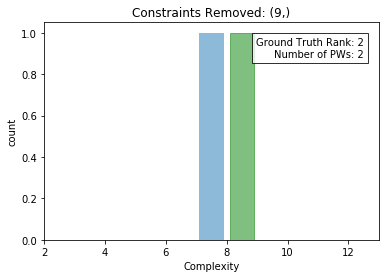

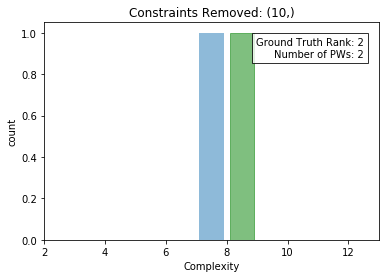

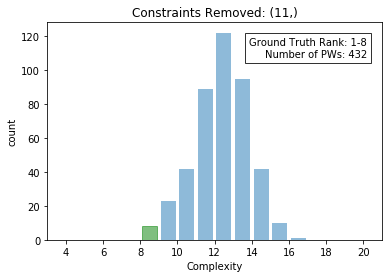

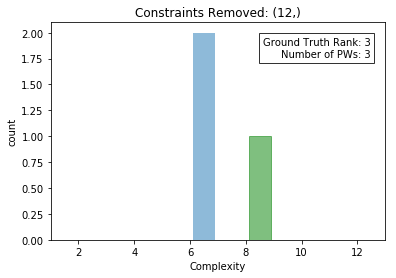

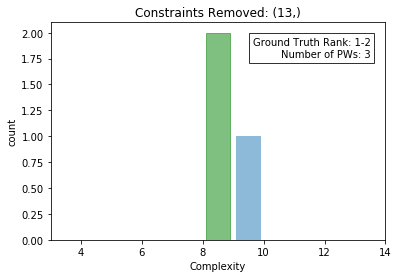

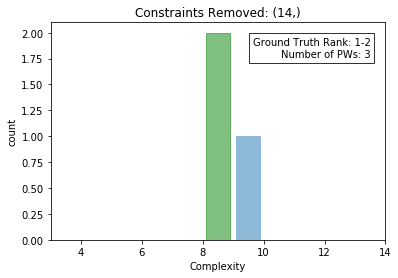

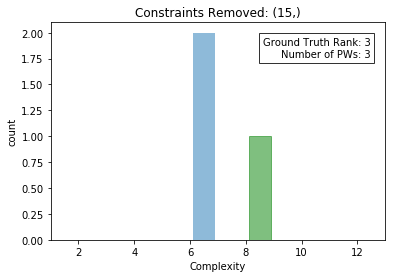

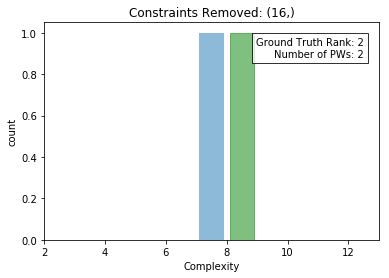

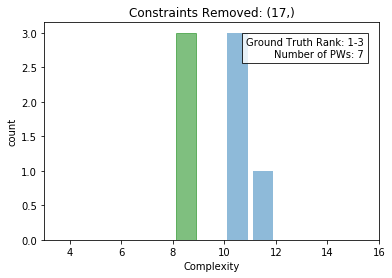

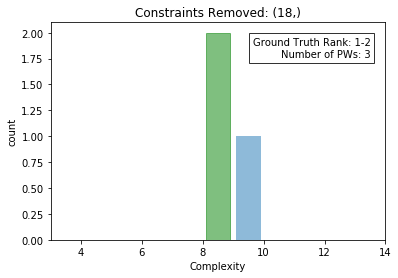

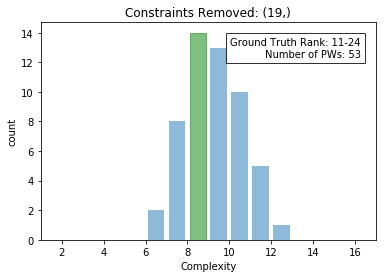

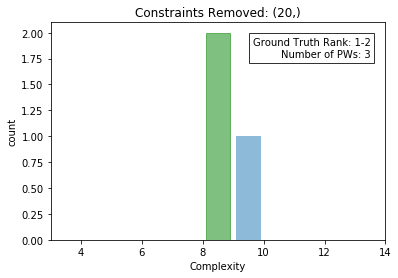

In [158]:
plot_performance(results)

In [ ]:
# In general it seems like the performance is really good when there are a lot of PWs, less so when there are only a few PWs

In [116]:
# plt.scatter(range(1, len(results['post_relaxation'][(21, 22, 24)]['complexities'])+1), list(zip(*results['post_relaxation'][(21, 22, 24)]['complexities']))[1])
# plt.scatter(x=0, y=-1, color='green')
# plt.axhline(y=-1)
# plt.ylabel('Complexity')

In [117]:
with open('autos_results.pkl', 'wb') as f:
    pkl.dump(results, f)

In [161]:
cen_ndc_results = None
cen_tz_results = None
ndc_tz_results = None
magnolia_83_14_results = None
magnolia_91_14_results = None
magnolia_12_14_results = None
autos_results = None
with open('cen_ndc_results.pkl', 'rb') as f:
    cen_ndc_results = pkl.load(f)
with open('cen_tz_results.pkl', 'rb') as f:
    cen_tz_results = pkl.load(f)
with open('ndc_tz_results.pkl', 'rb') as f:
    ndc_tz_results = pkl.load(f)
with open('magnolia_83_14_results.pkl', 'rb') as f:
    magnolia_83_14_results = pkl.load(f)
with open('magnolia_91_14_results.pkl', 'rb') as f:
    magnolia_91_14_results = pkl.load(f)
with open('magnolia_2012_results.pkl', 'rb') as f:
    magnolia_12_14_results = pkl.load(f)
with open('autos_results.pkl', 'rb') as f:
    autos_results = pkl.load(f)

In [ ]:
draw(autos_results['gt_dfs'])

Constraints:
              Node1 Relation            Node2
0   "T1_Automobile"   parent       "T1_Sedan"
1   "T1_Automobile"   parent       "T1_Wagon"
2   "T1_Automobile"   parent         "T1_SUV"
3        "T1_Sedan"   parent  "T1_Sedan_Audi"
4        "T1_Sedan"   parent   "T1_Sedan_BMW"
5        "T1_Wagon"   parent  "T1_Wagon_Audi"
6        "T1_Wagon"   parent   "T1_Wagon_BMW"
7   "T2_Automobile"   parent        "T2_Audi"
8   "T2_Automobile"   parent         "T2_BMW"
9         "T2_Audi"   parent  "T2_Sedan_Audi"
10        "T2_Audi"   parent  "T2_Wagon_Audi"
11        "T2_Audi"   parent    "T2_SUV_Audi"
12         "T2_BMW"   parent   "T2_Sedan_BMW"
13         "T2_BMW"   parent     "T2_SUV_BMW"
14  "T1_Automobile"        =  "T2_Automobile"
15  "T1_Sedan_Audi"        =  "T2_Sedan_Audi"
16   "T1_Sedan_BMW"        =   "T2_Sedan_BMW"
17  "T1_Wagon_Audi"        =  "T2_Wagon_Audi"
18   "T1_Wagon_BMW"        <         "T2_BMW"
19         "T1_SUV"        >    "T2_SUV_Audi"


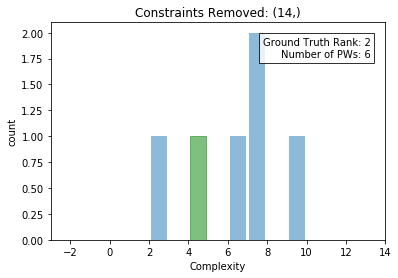

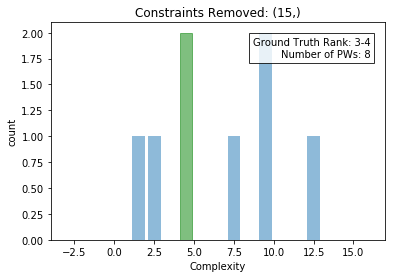

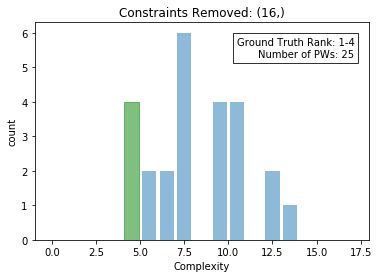

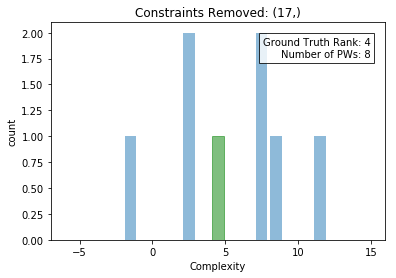

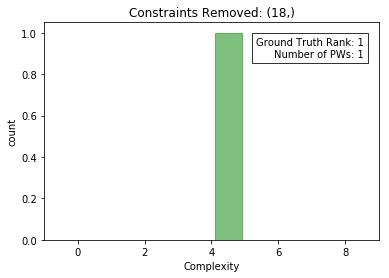

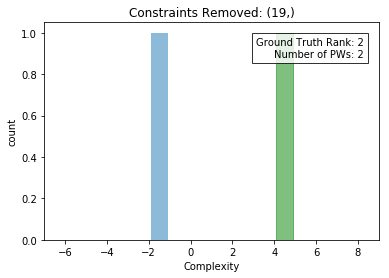

In [163]:
plot_performance(autos_results)

In [30]:
f_ex = ndc_tz_results['post_relaxation'][(19,)]

In [37]:
f_ex_dfs = f_ex['dfs']
f_ex_pws = f_ex['pws']
f_ex_rels = f_ex['rels']
f_ex_complexities = f_ex['complexities']
f_ex_gt_complexity_rank = f_ex['gt_complexity_rank']

In [43]:
f_ex_complexities

[(2, 5),
 (6, 5),
 (18, 5),
 (1, 6),
 (3, 6),
 (7, 6),
 (10, 6),
 (22, 6),
 (30, 6),
 (38, 6),
 (4, 7),
 (8, 7),
 (11, 7),
 (12, 7),
 (14, 7),
 (19, 7),
 (20, 7),
 (23, 7),
 (24, 7),
 (31, 7),
 (32, 7),
 (39, 7),
 (40, 7),
 (42, 7),
 (5, 8),
 (9, 8),
 (13, 8),
 (15, 8),
 (16, 8),
 (25, 8),
 (26, 8),
 (33, 8),
 (34, 8),
 (41, 8),
 (43, 8),
 (44, 8),
 (46, 8),
 (17, 9),
 (21, 9),
 (27, 9),
 (28, 9),
 (35, 9),
 (36, 9),
 (45, 9),
 (47, 9),
 (48, 9),
 (50, 9),
 (29, 10),
 (37, 10),
 (49, 10),
 (51, 10),
 (52, 10),
 (53, 11)]

In [42]:
f_ex_vizs = euler_visualization_nxpd.visualize(dfs=f_ex_dfs, pws=f_ex_pws, relations=f_ex_rels, conn=None, project_name='ndc_tz', save_to_file=False)

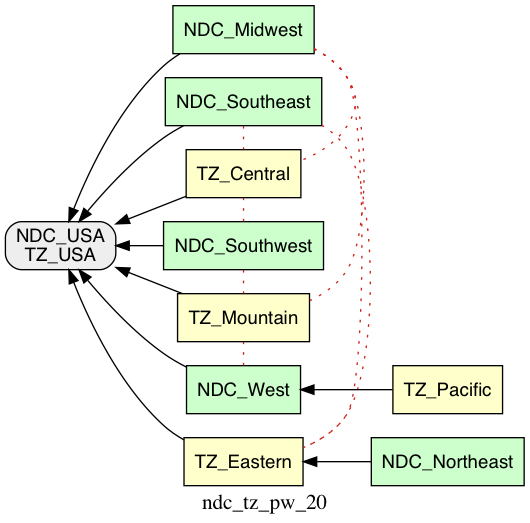

In [130]:
draw(f_ex_vizs[19])

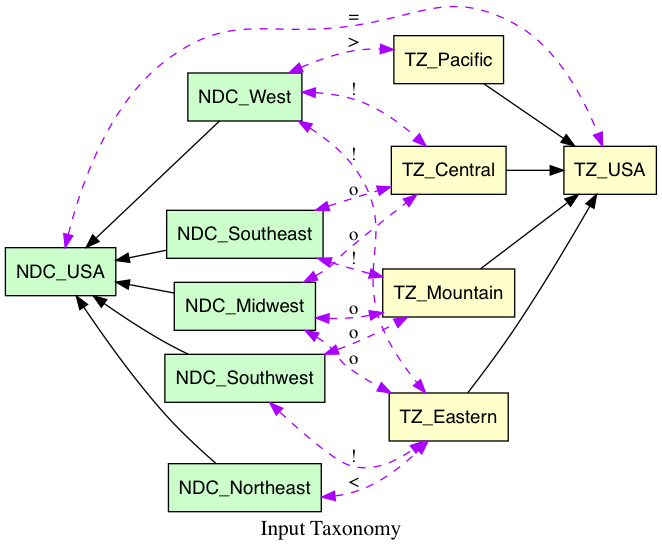

In [120]:
draw(visualize_euler_input(rel_data=ndc_tz_results['gt_rel_data'], taxes=ndc_tz_results['tax_data']))

In [256]:
# results = {
#     'gt_dfs': gt_dfs,
#     'gt_pws': gt_pws,
#     'gt_rel_data': gt_rel_data,
#     'tax_data': tax_data,
#     'post_relaxation': {},
# }

In [596]:
# gt_complexity = complexity(1, gt_dfs, gt_rels)
# gt_complexity

In [275]:
# for rel_to_rmv in range(21, len(gt_rel_data)):
#     k = list(range(len(gt_rel_data)))
#     k.remove(rel_to_rmv)
#     rel_data = gt_rel_data.iloc[k,:].copy(deep=False)
#     # G = visualize_euler_input(rel_data, tax_data)
#     # draw(G)
#     rules = LeanEuler.gen_asp_rules(rel_data, tax_data, encoding='mnpw')
#     clingo_soln = run_clingo(clingo_rules=rules)
#     # print('\n'.join(clingo_soln2))
#     dfs, rels, pws = load_worlds(clingo_output=clingo_soln, preprocessed=False, reasoner='clingo')
#     # print(list(map(lambda x: x.__dict__, rels2)))
    
#     #gt_pw_id = find_gt_pw_id(pws, gt_pws, rels, gt_rels)
#     #if gt_pw_id is None:
#     #    print("Couldn't find the ground truth PW.")
#     #    continue
    
#     # pws_vizs = euler_visualization_nxpd.visualize(dfs=dfs, pws=pws, relations=rels, conn=None, project_name='cen_ndc', save_to_file=False)
#     # draw(pws_vizs[19])
#     complexities = []
#     for i in range(len(pws)):
#         complexities.append((i+1, complexity(i+1, dfs, rels)))
#     # complexities = np.array(complexities)
#     complexities = sorted(complexities, key=lambda x: x[1])
#     dist_matrix = [(i+1, dist_func(rels, dfs, pws, gt_pw_id, i+1)) for i in range(len(pws)) if i+1 != gt_pw_id]
#     dist_matrix = sorted(dist_matrix, key= lambda x: x[1])
    
#     #gt_rank = find_rank(gt_pw_id, complexities)
    
#     gt_rank = find_rank_by_complexity(gt_complexity, complexities)
    
#     print("Rank of Ground Truth: {}".format(gt_rank))
    
#     results['post_relaxation'][rel_to_rmv] = {
#         'dist_matrix': dist_matrix,
#         'complexities': complexities,
#         'gt_pw_id': gt_pw_id,
#         'dfs': dfs,
#         'pws': pws,
#         'rels': rels,
#         'gt_complexity_rank': gt_rank,
#     }

In [271]:
# results.keys()

In [270]:
#results['post_relaxation'][21]['complexities']

In [272]:
# for c_id in results['post_relaxation']:
#     relaxed_constraint = results['gt_rel_data'].loc[c_id]
#     print("On relaxation of the {} {} {} constraint:".format(relaxed_constraint['Node1'], relaxed_constraint['Relation'], relaxed_constraint['Node2']))
#     print("Ground Truth ranks {} out of the {} possible worlds".format(results['post_relaxation'][c_id]['gt_complexity_rank'], len(results['post_relaxation'][c_id]['pws'])))

In [273]:
#cen_ndc_results.keys()

In [274]:
# for results in [cen_ndc_results, cen_tz_results, ndc_tz_results]:
#     for c_id in results['post_relaxation']:
#         relaxed_constraint = results['gt_rel_data'].loc[c_id]
#         print("On relaxation of the {} {} {} constraint:".format(relaxed_constraint['Node1'], relaxed_constraint['Relation'], relaxed_constraint['Node2']))
#         print("Ground Truth ranks {} out of the {} possible worlds".format(results['post_relaxation'][c_id]['gt_complexity_rank'], len(results['post_relaxation'][c_id]['pws'])))